In [67]:
# Importing needed packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns




In [2]:
# Loading the dataset 
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check the shape of the dataset 
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical summary of numerical columns 
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check unique values in each columns 
for column in data.columns[1:]:
    print(column)
    print('-----------------------------')
    print(data[column].unique())

gender
-----------------------------
['Female' 'Male']
SeniorCitizen
-----------------------------
[0 1]
Partner
-----------------------------
['Yes' 'No']
Dependents
-----------------------------
['No' 'Yes']
tenure
-----------------------------
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
-----------------------------
['No' 'Yes']
MultipleLines
-----------------------------
['No phone service' 'No' 'Yes']
InternetService
-----------------------------
['DSL' 'Fiber optic' 'No']
OnlineSecurity
-----------------------------
['No' 'Yes' 'No internet service']
OnlineBackup
-----------------------------
['Yes' 'No' 'No internet service']
DeviceProtection
-----------------------------
['No' 'Yes' 'No internet service']
TechSupport
-----------------------------
['No' 'Yes' 'No internet service']
Streami

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
numerical_data = data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
categorical_data = data.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'], axis  =  1)
numerical_data.info() , categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   

(None, None)

In [10]:
non_num = []
for i in numerical_data['TotalCharges']:
    try :
        float(i)
    except:
        non_num.append(i)
print(non_num)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [11]:
numerical_data['TotalCharges'].replace(' ', None, inplace= True)
numerical_data['TotalCharges'] = numerical_data['TotalCharges'].astype('float')


C:\Users\Admin\AppData\Local\Temp\ipykernel_8992\3865923045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['TotalCharges'].replace(' ', None, inplace= True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8992\3865923045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['TotalCharges'] = numerical_data['TotalCharges'].astype('float')


In [12]:
numerical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [13]:
categorical_data.shape

(7043, 17)

In [14]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")


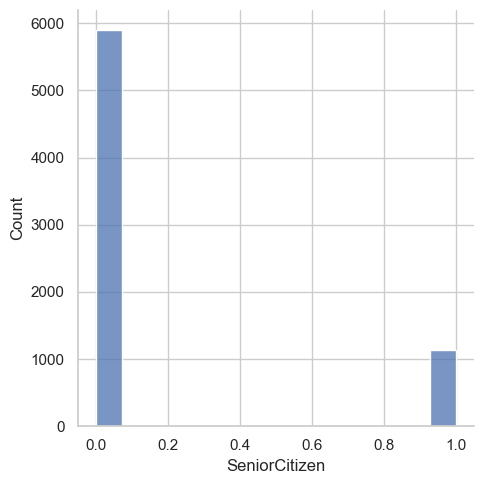

In [15]:
sns.displot(numerical_data['SeniorCitizen'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8992\566538924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_data['tenure'],bins = 30)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

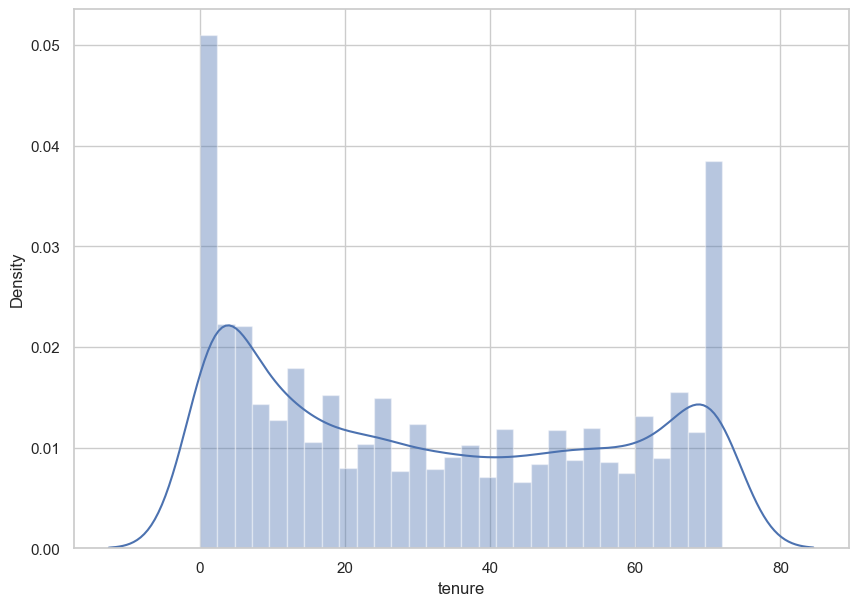

In [16]:
sns.distplot(numerical_data['tenure'],bins = 30)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8992\2259725122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_data['MonthlyCharges'],bins = 30)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

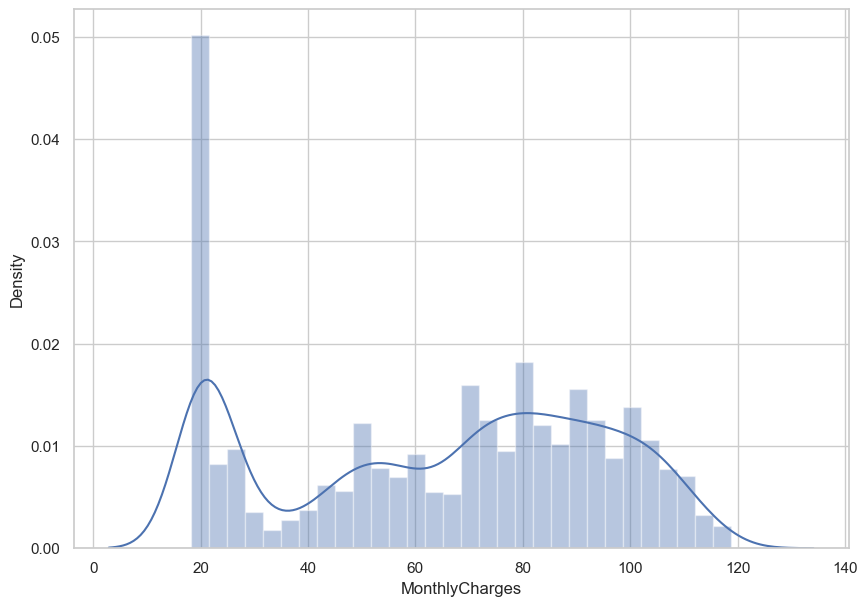

In [17]:
sns.distplot(numerical_data['MonthlyCharges'],bins = 30)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8992\2940540422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_data['TotalCharges'],bins = 30)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

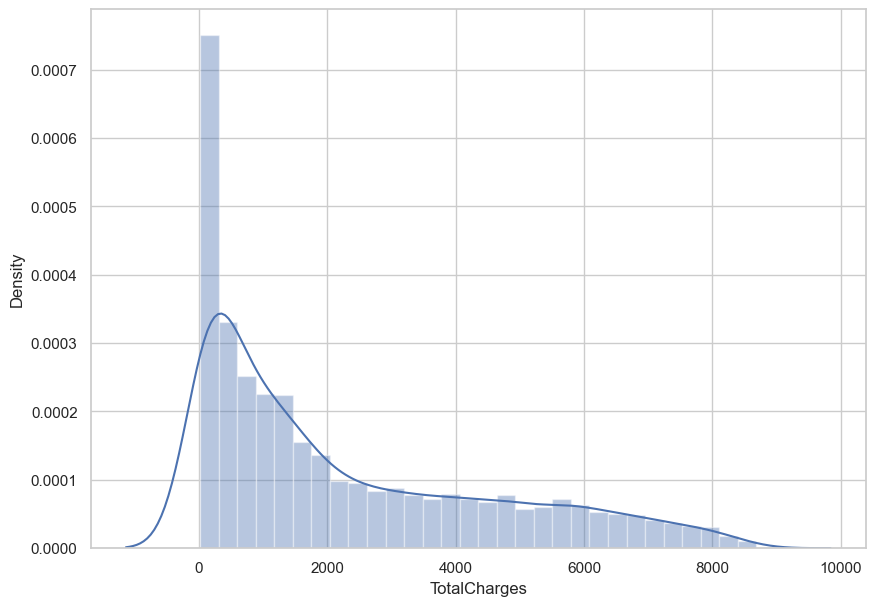

In [18]:
sns.distplot(numerical_data['TotalCharges'],bins = 30)

<AxesSubplot:ylabel='Churn'>

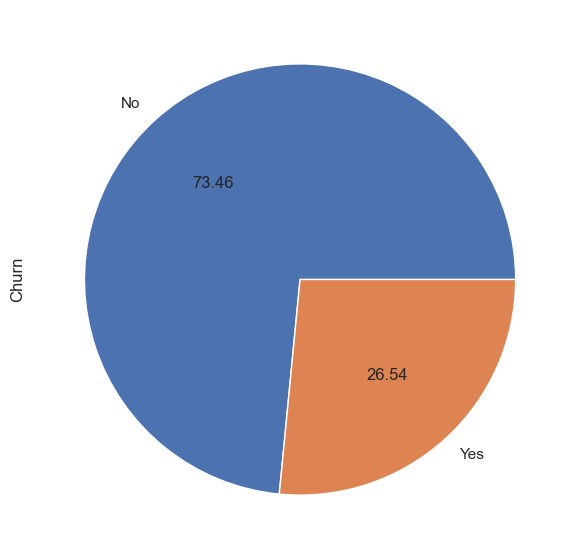

In [19]:
# Churn values distribution
categorical_data.Churn.value_counts().plot.pie(autopct = '%.2f')

In [21]:
categorical_data.drop('customerID', axis = 1 , inplace = True)



In [22]:
data_enc = pd.get_dummies(categorical_data, drop_first=True)
data_enc.shape


(7043, 27)

In [23]:
data_new = data_enc.drop(['InternetService_No','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service','MultipleLines_No phone service'],axis = 1)

In [24]:
cor = data_new.corr(method = 'pearson')
cor.style.background_gradient('coolwarm')


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
gender_Male,1.000000,-0.001808,0.010517,-0.006488,-0.008414,-0.011286,0.006026,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612
Partner_Yes,-0.001808,1.000000,0.452676,0.017706,0.142057,0.000304,0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448
Dependents_Yes,0.010517,0.452676,1.000000,-0.001762,-0.024526,-0.165818,0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221
PhoneService_Yes,-0.006488,0.017706,-0.001762,1.000000,0.279690,0.289999,0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942
MultipleLines_Yes,-0.008414,0.142057,-0.024526,0.279690,1.000000,0.366083,-0.210564,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102
InternetService_Fiber optic,-0.011286,0.000304,-0.165818,0.289999,0.366083,1.000000,-0.465793,-0.030696,0.165651,0.176049,-0.020492,0.329349,0.322923,-0.076324,-0.211526,0.326853,-0.050077,0.336410,-0.306834,0.308020
OnlineSecurity_No internet service,0.006026,0.000615,0.139812,0.172209,-0.210564,-0.465793,1.000000,-0.333403,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
OnlineSecurity_Yes,-0.017021,0.143106,0.080972,-0.092893,0.098108,-0.030696,-0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.100162,0.191773,-0.003636,0.115721,-0.112338,-0.080798,-0.171226
OnlineBackup_Yes,-0.013773,0.141498,0.023671,-0.052312,0.202237,0.165651,-0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.083722,0.111400,0.126735,0.090785,-0.000408,-0.174164,-0.082255
DeviceProtection_Yes,-0.002105,0.153786,0.013963,-0.071227,0.201137,0.176049,-0.380754,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.102495,0.165096,0.103797,0.111554,-0.003351,-0.187373,-0.066160


In [25]:
data_new.shape

(7043, 20)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



In [27]:
final_data = pd.concat([data_new, numerical_data], axis = 1 )

In [86]:
final_data = final_data.sample(frac=1)
print(final_data.Churn_Yes.value_counts())
final_0_data = final_data[final_data['Churn_Yes'] == 0]
final_1_data = final_data[final_data['Churn_Yes'] == 1]

print("Number of records in class 0 is",final_0_data.shape)
print("Number of records in class 1 is",final_1_data.shape)


#num_major_class = round(len(final_1_data) + (len(final_0_data) - len(final_1_data)) /  2)
print(len(final_1_data))
df = pd.concat([final_0_data[len(final_1_data):], final_1_data] , axis = 0)

#print('The number of examples in class 0 is: ', num_major_class)
df.Churn_Yes.value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64
Number of records in class 0 is (5163, 24)
Number of records in class 1 is (1869, 24)
1869


0    3294
1    1869
Name: Churn_Yes, dtype: int64

In [116]:

df.dropna(inplace=True)
X = df.drop('Churn_Yes', axis = 1)
y = df['Churn_Yes']


smote = SMOTE(sampling_strategy='minority')

X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, )

print(X_train.shape[1])

X_sm ,y_sm = smote.fit_resample(X_train,y_train)

scaler = MinMaxScaler()
scaler.fit(X_sm)

X_train_trans = scaler.transform(X_sm)
X_test_trans = scaler.transform(X_test)


#pca = PCA(0.95)
#pca.fit(X_train_trans)

#X_train_trans = pca.transform(X_train_trans)
#X_test_trans = pca.transform(X_test_trans)

23


In [78]:
pca.n_components_

18

## Random Forest 

In [117]:
classifier = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=8,min_samples_split= 10,min_samples_leaf = 5)
classifier.fit(X_train_trans,y_sm)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [118]:
pred = classifier.predict(X_test_trans)

In [119]:
accuracy_score(y_test, pred)

0.750242013552759

In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       692
           1       0.60      0.72      0.66       341

    accuracy                           0.75      1033
   macro avg       0.72      0.74      0.73      1033
weighted avg       0.77      0.75      0.76      1033



In [121]:
confusion_matrix(y_test, pred)

array([[528, 164],
       [ 94, 247]], dtype=int64)

## XGBoost

In [122]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [123]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [124]:
GridSearchCV_1 = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 10,
    verbose = True
)

In [125]:
eval_set = [(X_test_trans,y_test)]

In [126]:
GridSearchCV_1.fit(X_train_trans, 
                    y_sm,
                    eval_set=eval_set)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [92]:
GridSearchCV_1.best_score_

0.7963022007577645

In [95]:
GridSearchCV_1.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 180}

In [111]:
xgb_boost_1 = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 3, n_estimators =  180)

In [113]:
xgb_boost_1.fit(X_train_trans,y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [114]:
pred_xgb = xgb_boost_1.predict(X_test_trans)

In [115]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       654
           1       0.64      0.78      0.70       379

    accuracy                           0.76      1033
   macro avg       0.75      0.76      0.75      1033
weighted avg       0.78      0.76      0.76      1033



In [97]:
import tensorflow as tf


In [98]:
# Crete the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(100, activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(100, activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

# compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(X_train_trans, 
                        y_sm,
                        epochs =150,
                        validation_data = (X_test_trans,y_test))

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
165/165 [==============================] - 2s 5ms/step - loss: 10.7851 - accuracy: 0.6801 - val_loss: 9.4239 - val_accuracy: 0.7115
Epoch 2/150
165/165 [==============================] - 0s 3ms/step - loss: 8.2995 - accuracy: 0.7464 - val_loss: 7.2507 - val_accuracy: 0.7212
Epoch 3/150
165/165 [==============================] - 0s 3ms/step - loss: 6.3803 - accuracy: 0.7650 - val_loss: 5.5748 - val_accuracy: 0.7318
Epoch 4/150
165/165 [==============================] - 0s 3ms/step - loss: 4.9026 - accuracy: 0.7746 - val_loss: 4.2877 - val_accuracy: 0.7377
Epoch 5/150
165/165 [==============================] - 0s 3ms/step - loss: 3.7706 - accuracy: 0.7784 - val_loss: 3.3064 - val_accuracy: 0.7386
Epoch 6/150
165/165 [==============================] - 0s 3ms/step - loss: 2.9101 - accuracy: 0.7839 - val_loss: 2.5679 - val_accuracy: 0.7425
Epoch 7/150
165/165 [==============================] - 0s 3ms/step - loss: 2.2618 - accuracy: 0.7833 - val_loss: 2.0089 - val_accuracy: 0.742

<AxesSubplot:>

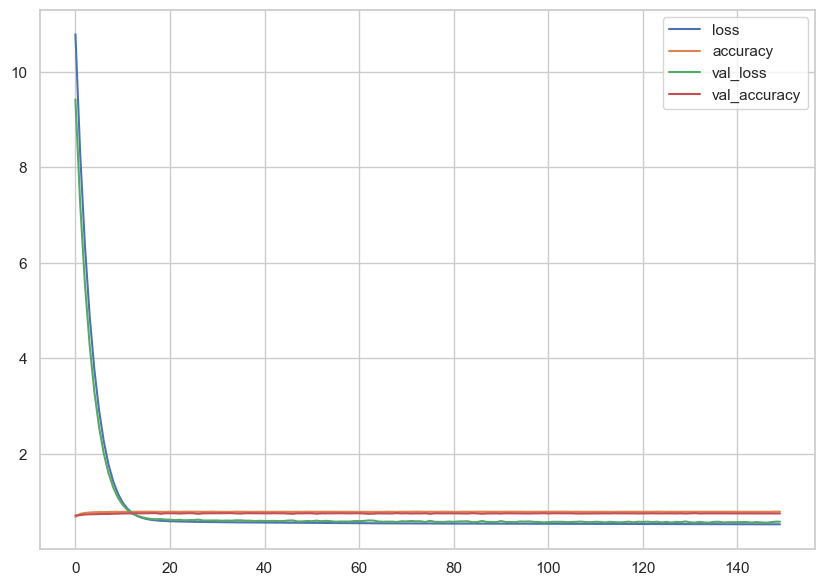

In [99]:
pd.DataFrame(history_1.history).plot()

In [104]:
nn_pred = model_1.predict(X_test_trans)

33/33 [==============================] - 0s 2ms/step


In [105]:
pred_nn = np.zeros(len(pred))

for i in range(len(nn_pred)):
    if nn_pred[i][0] < 0.5 :
        pred_nn[i] = 0
    else :
        pred_nn[i] = 1 

In [106]:
pred_nn

array([0., 1., 0., ..., 0., 1., 0.])

In [107]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       654
           1       0.63      0.78      0.70       379

    accuracy                           0.75      1033
   macro avg       0.74      0.76      0.75      1033
weighted avg       0.77      0.75      0.76      1033

